## Data Cleaning and Processing

In this section, we will clean the data further to eliminate irrelevant information from the dataset for predicting flight delays. This is done to remove noise.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pyairports.airports import Airports, AirportNotFoundException
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
from plotly_calplot import calplot
sb.set() # set the default Seaborn style for graphics

In [2]:
flight_data = pd.read_csv('C:\\Users\\ISABELLE\\Desktop\\Combined_Flights_2021.csv')
flight_data.head()

C:\Users\ISABELLE\AppData\Local\Temp\ipykernel_13944\3789217221.py:1: DtypeWarning: Columns (12,14,58,79,86,87,94) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv('C:\\Users\\ISABELLE\\Desktop\\Combined_Flights_2021.csv')


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
0,0,2021,3,9,15,3,2021-09-15,DL,DL,19790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021,3,9,15,3,2021-09-15,DL,DL,19790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021,3,9,15,3,2021-09-15,DL,DL,19790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021,3,9,15,3,2021-09-15,DL,DL,19790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021,3,9,15,3,2021-09-15,DL,DL,19790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Displaying detailed information about the flight_data DataFrame
flight_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 120 columns):
 #    Column                                              Dtype  
---   ------                                              -----  
 0    Unnamed: 0                                          int64  
 1    Year                                                int64  
 2    Quarter                                             int64  
 3    Month                                               int64  
 4    DayofMonth                                          int64  
 5    DayOfWeek                                           int64  
 6    FlightDate                                          object 
 7    Marketing_Airline_Network                           object 
 8    Operated_or_Branded_Code_Share_Partners             object 
 9    DOT_ID_Marketing_Airline                            int64  
 10   IATA_Code_Marketing_Airline                         object 
 11   Flight_Number_Marketin

In [4]:
# Understanding the data columns 

print(flight_data[['DepDelayMinutes', 'DepDelay']].head())

# We deduce that DepDelayMinutes is 0 when the flights did not delay(i.e. DepDelay is negative).  

   DepDelayMinutes  DepDelay
0              0.0      -5.0
1              0.0      -3.0
2              0.0      -5.0
3              0.0      -3.0
4              0.0      -3.0


In [5]:
print(flight_data[['DepDelay', 'DepDel15']].head(50))

#Deduce that DepDel15 indicates delays. If the flights delay, it will show 1(see row 36), and 0 if not.  

    DepDelay  DepDel15
0       -5.0       0.0
1       -3.0       0.0
2       -5.0       0.0
3       -3.0       0.0
4       -3.0       0.0
5       -2.0       0.0
6       -2.0       0.0
7      -10.0       0.0
8      -16.0       0.0
9        9.0       0.0
10     -11.0       0.0
11      36.0       1.0
12      -4.0       0.0
13      -3.0       0.0
14       1.0       0.0
15      -3.0       0.0
16       0.0       0.0
17     141.0       1.0
18      -2.0       0.0
19     -10.0       0.0
20       7.0       0.0
21      -4.0       0.0
22     182.0       1.0
23      -3.0       0.0
24       3.0       0.0
25      -5.0       0.0
26       7.0       0.0
27      -5.0       0.0
28      -8.0       0.0
29     -10.0       0.0
30      -6.0       0.0
31      -5.0       0.0
32      -3.0       0.0
33      -2.0       0.0
34       4.0       0.0
35      -2.0       0.0
36      -1.0       0.0
37      -1.0       0.0
38      -3.0       0.0
39      -1.0       0.0
40      -7.0       0.0
41      -7.0       0.0
42      -3.

In [6]:
unique_groups = flight_data['DepartureDelayGroups'].unique()

# Print unique groups
print("Unique groups of DepartureDelayGroups:")
for group in sorted(unique_groups):
    print(group)

Unique groups of DepartureDelayGroups:
-2.0
-1.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
nan


In [7]:
# Group by 'DepartureDelayGroups' and get the first occurrence of 'DepDelay' within each group
first_occurrences = flight_data.groupby('DepartureDelayGroups')['DepDelay'].first()

# Print the first occurrences
print("First occurrence of DepDelay corresponding to each DepartureDelayGroup:")
for group, dep_delay in first_occurrences.items():
    print(f"Group {group}: {dep_delay}")
    
# Deduce that DepartureDelayGroup shows the intervals of delays. Each increment of 1 for DepartureDelayGroup
# implies a 15 min interval; e.g. Group 0.0 has an interval of [0, 15], group 1.0 has an interval of [15,30].

First occurrence of DepDelay corresponding to each DepartureDelayGroup:
Group -2.0: -16.0
Group -1.0: -5.0
Group 0.0: 9.0
Group 1.0: 20.0
Group 2.0: 36.0
Group 3.0: 47.0
Group 4.0: 62.0
Group 5.0: 88.0
Group 6.0: 104.0
Group 7.0: 108.0
Group 8.0: 129.0
Group 9.0: 141.0
Group 10.0: 160.0
Group 11.0: 177.0
Group 12.0: 182.0


In [8]:
# Count number of diverted flights
diverted_count = flight_data[flight_data['Diverted'] == True]['Diverted'].count()
print("Number of diverted flights:", diverted_count)

# Count number of cancelled flights
cancelled_count = flight_data[flight_data['Cancelled'] == True]['Cancelled'].count()
print("Number of cancelled flights:", cancelled_count)

# Count number of flights that are both diverted and cancelled
both_diverted_cancelled_count = flight_data[(flight_data['Diverted'] == True) & (flight_data['Cancelled'] == True)].shape[0]
print("Number of flights that are both diverted and cancelled:", both_diverted_cancelled_count)

# We read that diverted flights are considered legally cancelled (source: https://www.iuno.law/news/consequences-of-a-diverted-flight/#:~:text=Thus%2C%20if%20a%20flight%20has,the%20flight%20had%20been%20delayed.)
# We thus see that diverted flights are counted differently than cancelled flights for this dataset. 

Number of diverted flights: 14982
Number of cancelled flights: 111018
Number of flights that are both diverted and cancelled: 0


In [9]:
# Count the number of rows with NA values for each column
na_counts = flight_data.isna().sum()

# Print the result for columns with NA values
print("Number of rows with NA values in each column:")
for column, count in na_counts.items():
    if count > 0:
        print(f"{column}: {count}")

Number of rows with NA values in each column:
Originally_Scheduled_Code_Share_Airline: 6311384
DOT_ID_Originally_Scheduled_Code_Share_Airline: 6311384
IATA_Code_Originally_Scheduled_Code_Share_Airline: 6311384
Flight_Num_Originally_Scheduled_Code_Share_Airline: 6311384
Tail_Number: 23303
DepTime: 108325
DepDelay: 108413
DepDelayMinutes: 108413
DepDel15: 108413
DepartureDelayGroups: 108413
TaxiOut: 110353
WheelsOff: 110353
WheelsOn: 112425
TaxiIn: 112425
ArrTime: 112408
ArrDelay: 126001
ArrDelayMinutes: 126001
ArrDel15: 126001
ArrivalDelayGroups: 126001
CancellationCode: 6200853
CRSElapsedTime: 1
ActualElapsedTime: 126001
AirTime: 126001
CarrierDelay: 5243813
WeatherDelay: 5243813
NASDelay: 5243813
SecurityDelay: 5243813
LateAircraftDelay: 5243813
FirstDepTime: 6273805
TotalAddGTime: 6273808
LongestAddGTime: 6273808
DivAirportLandings: 2
DivReachedDest: 6296889
DivActualElapsedTime: 6298278
DivArrDelay: 6298278
DivDistance: 6296889
Div1Airport: 6296222
Div1AirportID: 6296222
Div1Airport

In [10]:
print("Statistical summary for DepDelay:")
print(flight_data['DepDelay'].describe())

print("\nStatistical summary for ArrDel15:")
print(flight_data['ArrDel15'].describe())

Statistical summary for DepDelay:
count    6.203458e+06
mean     9.468347e+00
std      4.837844e+01
min     -1.050000e+02
25%     -6.000000e+00
50%     -2.000000e+00
75%      6.000000e+00
max      3.095000e+03
Name: DepDelay, dtype: float64

Statistical summary for ArrDel15:
count    6.185870e+06
mean     1.726611e-01
std      3.779540e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ArrDel15, dtype: float64


For cells with NA values, we decided to drop them as our response variable (DepDelayMinutes) is swayed by a multitude of unknown aspects. The variability/standard deviation appears to be rather large as well, so imputation may lead to increased inaccuracy.

In [11]:
# List of columns for which you want to drop NA values -> This means we also dropped cancelled flights.
columns_to_dropna = ['DepDelayMinutes','ArrDelayMinutes']

# Drop rows with NA values in the specified columns
flight_data = flight_data.dropna(subset=columns_to_dropna)

#This is just an intial measure though. After we may also drop things to predict delays. 

# Exploratory Data Analysis (EDA)

According to the United States Federal Aviation Administration (FAA), there are 3 types of delays. Small delays are less than 15 minutes long, medium delays are between 15 minutes to 45 minutes long and large delays are longer than 45 minutes. So, we've done the same thing here.

In [12]:
# Create a new column "DelayGroup" and initialize it to None
flight_data["DelayGroup"] = None

# Assign delay categories based on the values in the "DepDelayMinutes" column
flight_data.loc[flight_data["DepDelayMinutes"] <= 0, "DelayGroup"] = "OnTime/Early"
flight_data.loc[(flight_data["DepDelayMinutes"] > 0) & (flight_data["DepDelayMinutes"] <= 15), "DelayGroup"] = "Small Delay"
flight_data.loc[(flight_data["DepDelayMinutes"] > 15) & (flight_data["DepDelayMinutes"] <= 45), "DelayGroup"] = "Medium Delay"
flight_data.loc[flight_data["DepDelayMinutes"] > 45, "DelayGroup"] = "Large Delay"

### Flights by Types of Delay

Plotting flights by delay type can provide insight into which types of delays are most common and the greatest impact on overall flight delays.

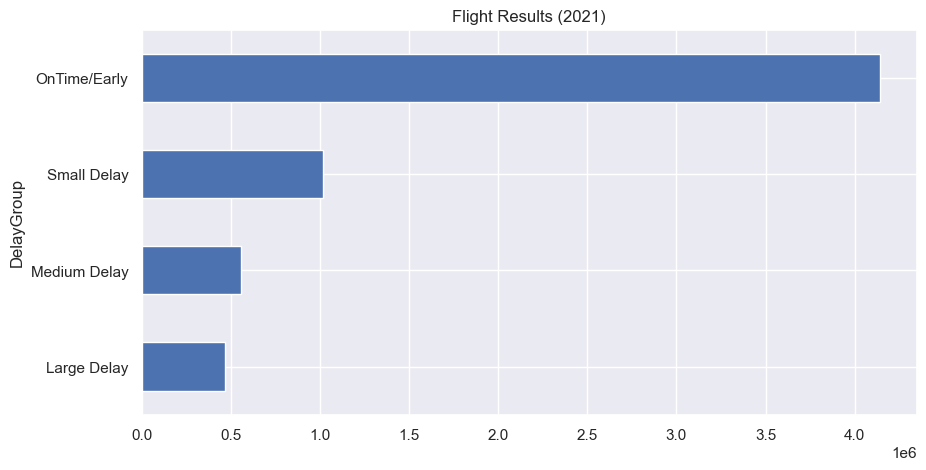

In [13]:
# Proportion of flights in the different delay groups
flight_data["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), title="Flight Results (2021)"
)
plt.show()

### Geospatial Analysis

Exploring and plotting the location of origin airports can help identify geographic patterns and potential regional factors influencing flight delays.

##### Information about the Origin Airports

In [14]:

# Retrieve unique origins
origin_unique = flight_data['Origin'].unique()

# Create an empty list to store airport information
airport_info_list = []

# Initialize Airports object
airports = Airports()

# Retrieve airport information for each origin
for origin in origin_unique:
    try:
        airport_info = airports.lookup(origin)
        airport_info_list.append(airport_info)
    except AirportNotFoundException as e:
        print(f"Airport information not found for {origin}: {e}")

# Create a DataFrame with the airport information
data = {
    'iata': [airport_info.iata for airport_info in airport_info_list],
    'latitude': [float(airport_info.lat) for airport_info in airport_info_list],
    'longitude': [float(airport_info.lon) for airport_info in airport_info_list],
}

df = pd.DataFrame(data)

print(df)


Airport information not found for OGD: iata not found in either airport list: OGD
Airport information not found for USA: iata not found in either airport list: USA
Airport information not found for SWO: iata not found in either airport list: SWO
Airport information not found for XWA: iata not found in either airport list: XWA
Airport information not found for BIH: iata not found in either airport list: BIH
    iata   latitude   longitude
0    MSP  44.881956  -93.221767
1    CLE  41.411689  -81.849794
2    JFK  40.639751  -73.778925
3    ATL  33.636719  -84.428067
4    SLC  40.788389 -111.977772
..   ...        ...         ...
370  CDB  55.206061 -162.725436
371  CYS  41.155722 -104.811839
372  TBN  37.741631  -92.140736
373  MKK  21.152886 -157.096256
374  LNY  20.785611 -156.951419

[375 rows x 3 columns]


##### Visualising all airports

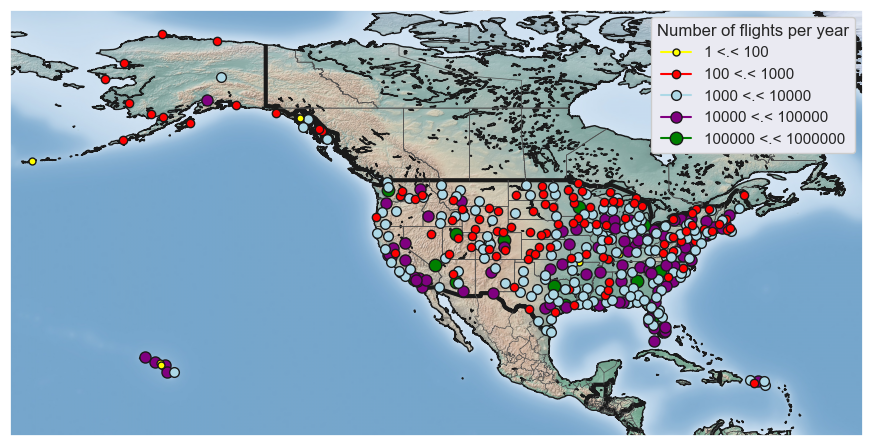

In [15]:
# Plot the map for all airports
plt.figure(figsize=(11,11))

# Define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

    
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth=3)
map.drawstates(color='0.3')

# Put airports on map
for index, row in df.iterrows():
    x, y = map(row['longitude'], row['latitude'])
    airport_code = row['iata']
    count_flights = flight_data['Origin'].value_counts().get(airport_code, 0)  # Get flight count for current airport
    isize = [i for i, val in enumerate(size_limits) if val < count_flights]
    ind = isize[-1] 
    map.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])

# Remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size':11},
           title='Number of flights per year', frameon=True, framealpha=1)
plt.show()

##### Isolating Major Airports

In [16]:
# First, calculate the number of flights for each airport
airport_flights_count = flight_data['Origin'].value_counts()

# Filter out airports with fewer than 10,000 flights
airports_to_keep = airport_flights_count[airport_flights_count >= 10000].index

# Drop airports with fewer than 10,000 flights
flight_data = flight_data[flight_data['Origin'].isin(airports_to_keep)]

##### Visualising the Location of Major Airports

IndexError: list index out of range

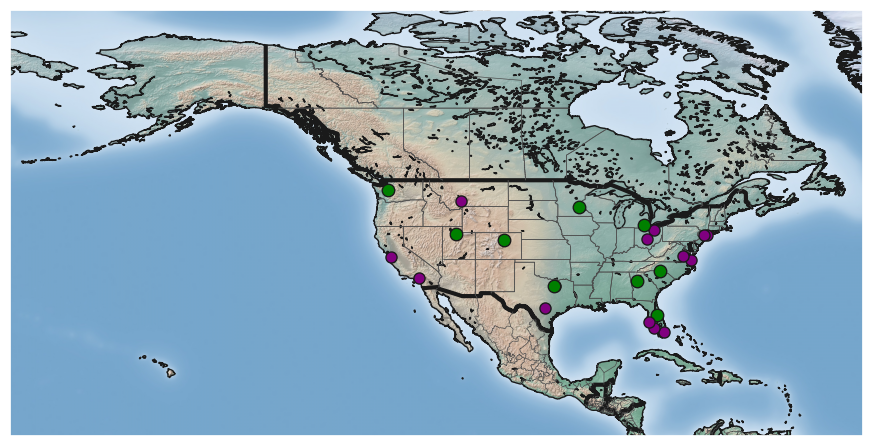

In [17]:
# Map of filtered flights
plt.figure(figsize=(11,11))

# Define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []

for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 

map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth=3)
map.drawstates(color='0.3')

# Put airports on map
for index, row in df.iterrows():
    x, y = map(row['longitude'], row['latitude'])
    airport_code = row['iata']
    count_flights = flight_data['Origin'].value_counts().get(airport_code, 0)  # Get flight count for current airport
    isize = [i for i, val in enumerate(size_limits) if val < count_flights]
    ind = isize[-1] 
    map.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])

# Remove duplicate labels and set their order
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    if key in by_label:
        new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size':11},
           title='Number of flights per year', frameon=True, framealpha=1)
plt.show()

Note there is an error above but the code still outputs what we wanted.

From the visualisation, it is clear that there is a cluster of major US airports positioned along the eastern coast. The most notable among them is ATL and CLT.

The high volume of flights, coupled with the complexity of operations at major hubs might lead to congestion, air traffic control issues, and weather-related disruptions, contributing to delays. 

Additionally, we hypothesise that the demand-driven nature of air travel to tourist destinations and international gateways may result in peak travel periods and capacity constraints, further exacerbating delays during busy times.

In [18]:
airport_counts = flight_data['Origin'].value_counts()

# Selecting the top 10 airports
top_10_airports = airport_counts.head(10)

# Printing the result
print("Top 10 airports by number of flights:")
print(top_10_airports)

Top 10 airports by number of flights:
Origin
ATL    310617
ORD    279012
DFW    270724
DEN    261605
CLT    223023
LAX    171697
SEA    165327
PHX    158378
IAH    149727
LAS    139030
Name: count, dtype: int64


In [19]:
# Selecting flight data from the top 10 airports
flight_data = flight_data[flight_data['Origin'].isin(top_10_airports.index)]

In [20]:
# Define a set to store airport codes from flight data
flight_airports = set(flight_data['Origin'])

# Initialize an empty list to store airports present in the flight data
present_airports = []

# Iterate over airports in the DataFrame and check if they are present in the flight data
for index, row in df.iterrows():
    airport_code = row['iata']
    if airport_code in flight_airports:
        present_airports.append(airport_code)

# Print the airports present in the flight data
print("Airports present in the flight data:", present_airports)

print("Number of Airports:", len(flight_data['Origin'].unique()))

Airports present in the flight data: ['ATL', 'SEA', 'CLT', 'DEN', 'DFW', 'LAX', 'IAH', 'ORD', 'LAS', 'PHX']
Number of Airports: 10


### Airports and Flight Delays Analysis

Exploring the relationship between airports and flight delays can reveal specific airports that consistently experience delays, potentially indicating underlying operational or logistical issues at those locations.

#### Statistical Summary of DepDelayMinutes

In [51]:
# Generate statistical summary for DepDelayMinutes
delay_summary = flight_data['DepDelayMinutes'].describe()

# Print the summary
print(delay_summary)

count    2.129140e+06
mean     1.275612e+01
std      4.426708e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      3.001000e+03
Name: DepDelayMinutes, dtype: float64


##### Airports with the highest percentage of On Time/Early Flights

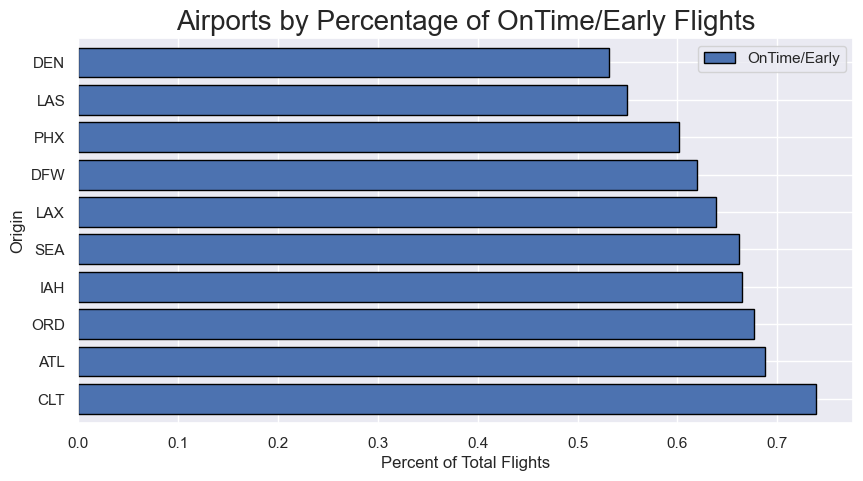

In [21]:
col_order = ["OnTime/Early", "Small Delay", "Medium Delay", "Large Delay"]
# Count the number of flights per airport
flight_counts = flight_data['Origin'].value_counts()

df_agg = (
    flight_data.groupby(["Origin"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

top_airports = df_agg["OnTime/Early"].sort_values(ascending=False).head(10)  # Select top 10 airports

fig, ax = plt.subplots(figsize=(10, 5))
top_airports.plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airports by Percentage of OnTime/Early Flights", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()


In [22]:
# Get the top 10 airports with the highest percentage of on-time flights
top_airports = df_agg["OnTime/Early"].sort_values(ascending=False).head(10)

# Print the names of the airports and their percentages of large delays
for airport, percentage in top_airports.items():
    print(f"Airport: {airport}, Percentage of On Time flights: {percentage:.2%}")


Airport: CLT, Percentage of On Time flights: 73.92%
Airport: ATL, Percentage of On Time flights: 68.81%
Airport: ORD, Percentage of On Time flights: 67.64%
Airport: IAH, Percentage of On Time flights: 66.51%
Airport: SEA, Percentage of On Time flights: 66.14%
Airport: LAX, Percentage of On Time flights: 63.84%
Airport: DFW, Percentage of On Time flights: 61.92%
Airport: PHX, Percentage of On Time flights: 60.15%
Airport: LAS, Percentage of On Time flights: 54.92%
Airport: DEN, Percentage of On Time flights: 53.19%


##### Airports with the highest percentage of Large Delay Flights

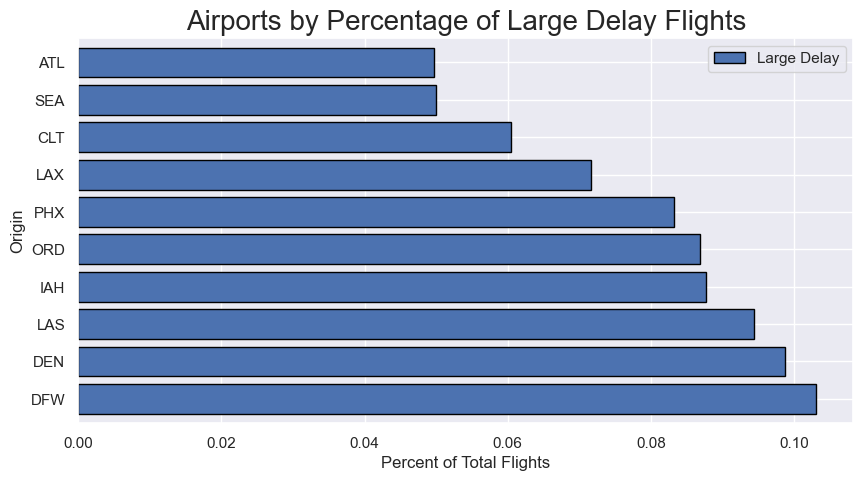

In [23]:
# By Percentage of Large Delays
df_agg = (
    flight_data.groupby(["Origin"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

worst_airports = df_agg["Large Delay"].sort_values(ascending=False).head(10)  # Select top 10 airports

fig, ax = plt.subplots(figsize=(10, 5))
worst_airports.plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airports by Percentage of Large Delay Flights", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [24]:
# Get the top 10 airports with the highest percentage of large delays
worst_airports_large_delay = df_agg["Large Delay"].sort_values(ascending=False).head(10)

# Print the names of the airports and their percentages of large delays
for airport, percentage in worst_airports_large_delay.items():
    print(f"Airport: {airport}, Percentage of Large Delays: {percentage:.2%}")

Airport: DFW, Percentage of Large Delays: 10.32%
Airport: DEN, Percentage of Large Delays: 9.88%
Airport: LAS, Percentage of Large Delays: 9.44%
Airport: IAH, Percentage of Large Delays: 8.78%
Airport: ORD, Percentage of Large Delays: 8.69%
Airport: PHX, Percentage of Large Delays: 8.33%
Airport: LAX, Percentage of Large Delays: 7.17%
Airport: CLT, Percentage of Large Delays: 6.05%
Airport: SEA, Percentage of Large Delays: 4.99%
Airport: ATL, Percentage of Large Delays: 4.97%


##### Airports with the highest percentage of Medium Delay Flights

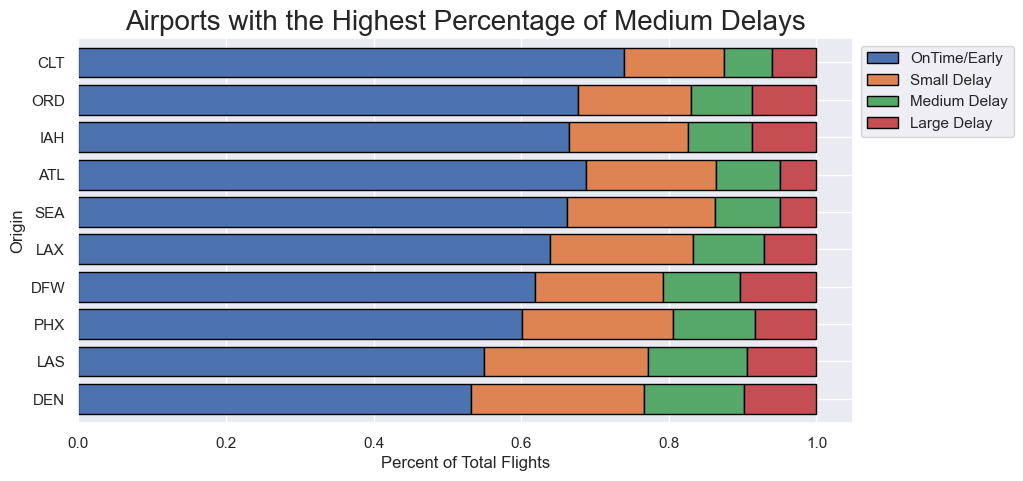

In [25]:
# Sort the DataFrame by "Medium_Delay" category to find the airlines with the highest percentage of large delays
df_agg_sorted = df_agg.sort_values("Medium Delay", ascending=False)

# Plot the top airlines with the highest percentage of medium delays
fig, ax = plt.subplots(figsize=(10, 5))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airports with the Highest Percentage of Medium Delays", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [26]:
# Print out the percentage of on-time flights for the top airlines
mid_airlines = df_agg["Medium Delay"].sort_values(ascending=False).head(22)
for airline, percentage in mid_airlines.items():
    print(f"{airline}: {percentage:.2%} flights with medium delays")

plt.show()

DEN: 13.44% flights with medium delays
LAS: 13.35% flights with medium delays
PHX: 11.10% flights with medium delays
DFW: 10.48% flights with medium delays
LAX: 9.50% flights with medium delays
SEA: 8.75% flights with medium delays
ATL: 8.65% flights with medium delays
IAH: 8.59% flights with medium delays
ORD: 8.35% flights with medium delays
CLT: 6.50% flights with medium delays


### Analysis of Airline and Flight Delays
This helps identify disparities in performance among different airlines regarding delays. It also allows for benchmarking and comparison between airlines, enabling stakeholders to assess how well each airline performs.

#### Number of Flights by Airline

Text(0.5, 0, 'Flights (100k)')

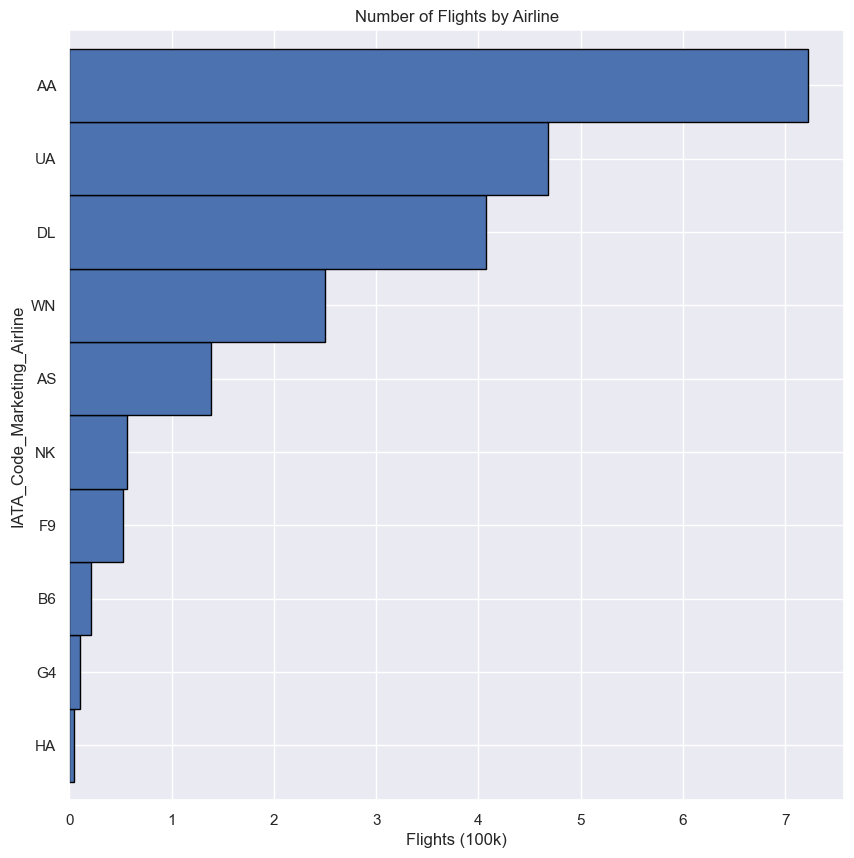

In [27]:
# Keep airlines that have more than 100 flights in the dataset
flight_data = flight_data[flight_data['Origin'].isin(flight_counts[flight_counts >= 100].index)]
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (flight_data["IATA_Code_Marketing_Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, width=1, edgecolor="black"
)
ax.set_title("Number of Flights by Airline")
ax.set_xlabel("Flights (100k)")

#### Airlines with the highest number of OnTime/Early Flights

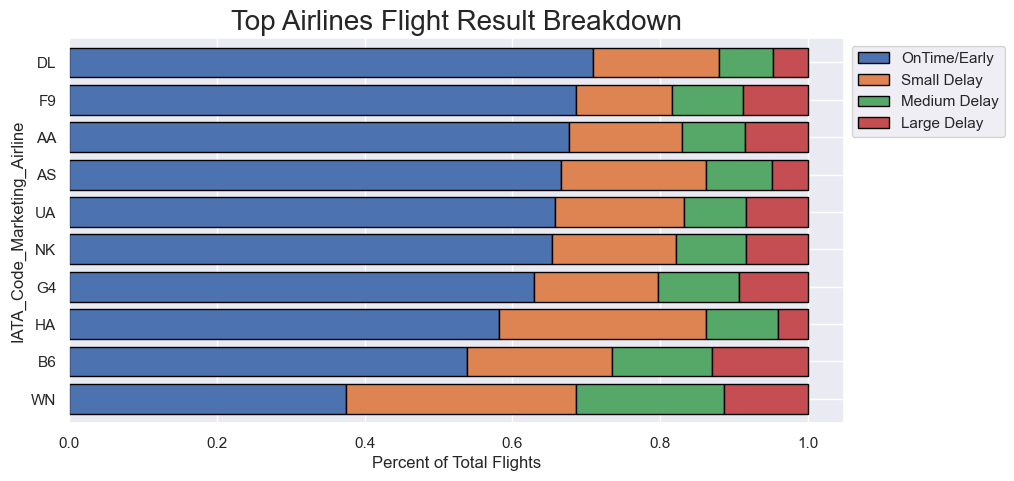

In [28]:
col_order = ["OnTime/Early", "Small Delay", "Medium Delay", "Large Delay"]

df_agg = (
    flight_data.groupby(["IATA_Code_Marketing_Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime/Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [29]:
# Print out the percentage of on-time flights for the top airlines
top_airlines = df_agg["OnTime/Early"].sort_values(ascending=False).head(22)
for airline, percentage in top_airlines.items():
    print(f"{airline}: {percentage:.2%} on-time flights")

plt.show()

DL: 70.95% on-time flights
F9: 68.62% on-time flights
AA: 67.74% on-time flights
AS: 66.60% on-time flights
UA: 65.76% on-time flights
NK: 65.37% on-time flights
G4: 62.88% on-time flights
HA: 58.21% on-time flights
B6: 53.83% on-time flights
WN: 37.53% on-time flights


In [30]:
# Print out the percentage of large delay flights for the airlines with the highest percentage of 
worst_airlines = df_agg["Large Delay"].sort_values(ascending=False).head(11)
for airline, percentage in worst_airlines.items():
    print(f"{airline}: {percentage:.2%} flights with Large Delays")

plt.show()

B6: 12.92% flights with Large Delays
WN: 11.38% flights with Large Delays
G4: 9.24% flights with Large Delays
F9: 8.78% flights with Large Delays
AA: 8.42% flights with Large Delays
UA: 8.36% flights with Large Delays
NK: 8.30% flights with Large Delays
AS: 4.86% flights with Large Delays
DL: 4.61% flights with Large Delays
HA: 3.99% flights with Large Delays


In [31]:
# Print out the percentage of on-time flights for the top airlines
mid_airlines = df_agg["Medium Delay"].sort_values(ascending=False).head(22)
for airline, percentage in mid_airlines.items():
    print(f"{airline}: {percentage:.2%} flights with medium delays")

plt.show()

WN: 19.95% flights with medium delays
B6: 13.62% flights with medium delays
G4: 11.06% flights with medium delays
HA: 9.70% flights with medium delays
F9: 9.62% flights with medium delays
NK: 9.54% flights with medium delays
AS: 8.86% flights with medium delays
AA: 8.53% flights with medium delays
UA: 8.38% flights with medium delays
DL: 7.44% flights with medium delays


#### Analysis by Geographical Area Covered
This allows us to identify high-traffic routes and regions and its relation to flight delays.

##### Airline and Geographical Area

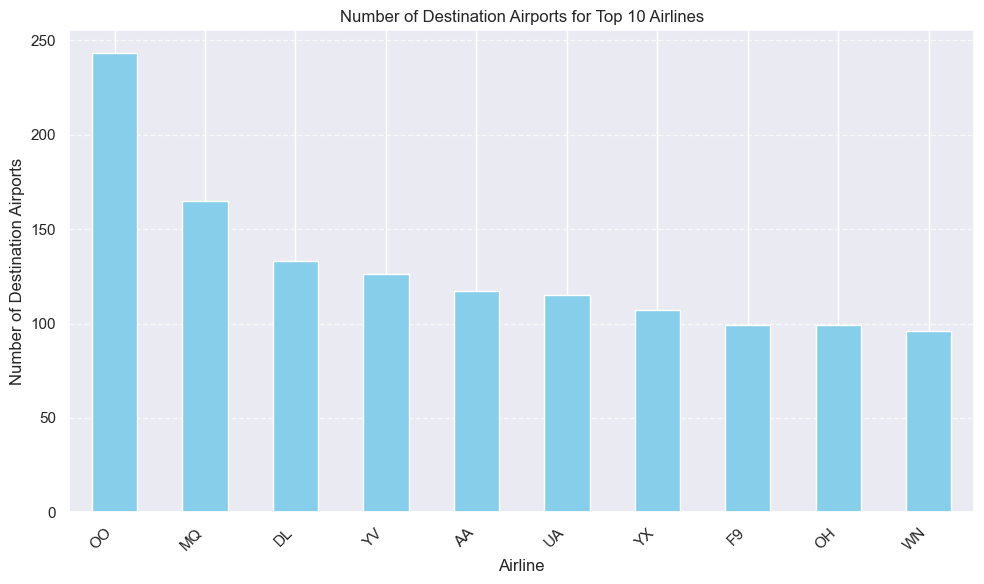

In [32]:
# Group flight data by airline and count unique destination airports
airline_destinations = flight_data.groupby('IATA_Code_Operating_Airline')['Dest'].nunique()

# Sort airlines based on the number of destination airports
sorted_airlines = airline_destinations.sort_values(ascending=False)

# Select top 10 airlines
top_10_airlines = sorted_airlines.head(10)

# Plot the number of destination airports for each of the top 10 airlines
plt.figure(figsize=(10, 6))
top_10_airlines.plot(kind='bar', color='skyblue')
plt.title('Number of Destination Airports for Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Destination Airports')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Destination Airports with the highest percentage of delayed flights

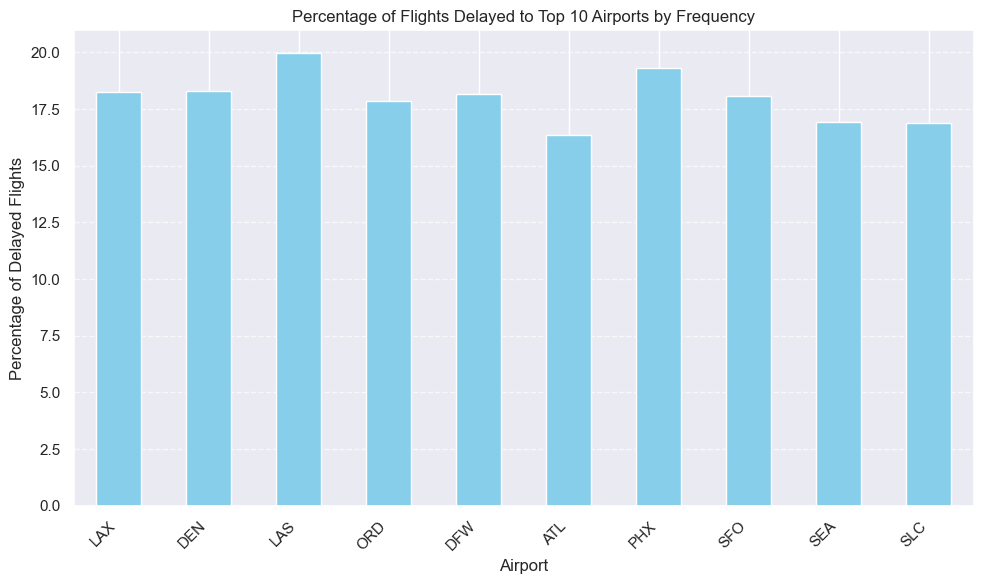

In [33]:
# Group flight data by destination airport and count total flights
total_flights_to_airport = flight_data['Dest'].value_counts()

# Select top 10 destination airports
top_10_airports = total_flights_to_airport.head(10)

# Calculate the number of delayed flights to each of the top 10 airports
delayed_flights_to_airport = flight_data[flight_data['DepDelayMinutes'] > 15]['Dest'].value_counts().reindex(top_10_airports.index, fill_value=0)

# Calculate the percentage of delayed flights to each airport
percentage_delayed = (delayed_flights_to_airport / top_10_airports) * 100

# Plot the percentage of delayed flights to each of the top 10 airports
plt.figure(figsize=(10, 6))
percentage_delayed.plot(kind='bar', color='skyblue')
plt.title('Percentage of Flights Delayed to Top 10 Airports by Frequency')
plt.xlabel('Airport')
plt.ylabel('Percentage of Delayed Flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Geographical Area and Origin Airport

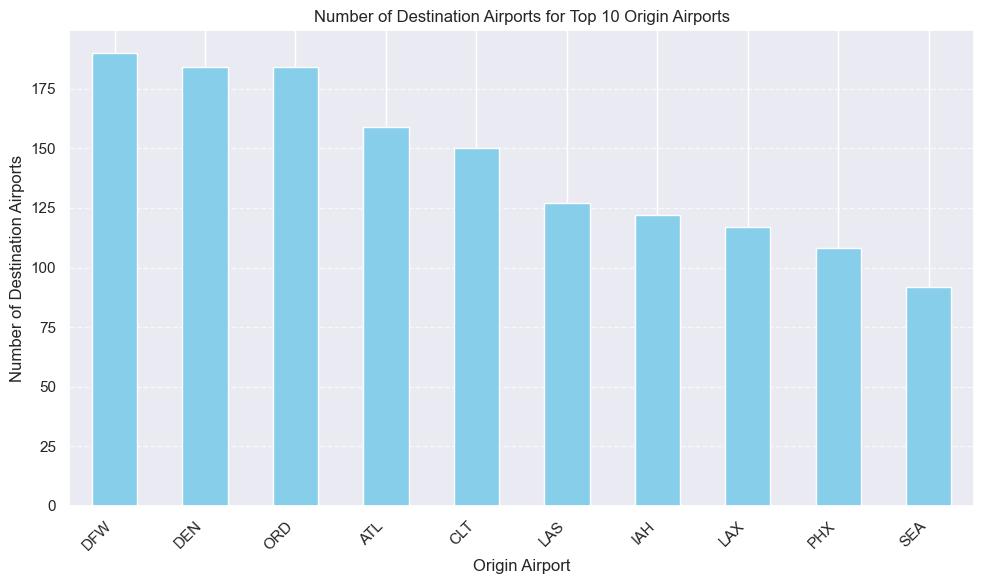

In [34]:
# Group flight data by origin airport and count unique destination airports
origin_destinations = flight_data.groupby('Origin')['Dest'].nunique()

# Sort origin airports based on the number of destination airports
sorted_origins = origin_destinations.sort_values(ascending=False)

# Select top 10 origin airports
top_10_origins = sorted_origins.head(10)

# Plot the number of destination airports for each of the top 10 origin airports
plt.figure(figsize=(10, 6))
top_10_origins.plot(kind='bar', color='skyblue')
plt.title('Number of Destination Airports for Top 10 Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Destination Airports')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Temporal Analysis
Identifying seasonal trends in flight delays can help airlines anticipate and prepare for periods of increased delays. 

##### Frequency of flights per month

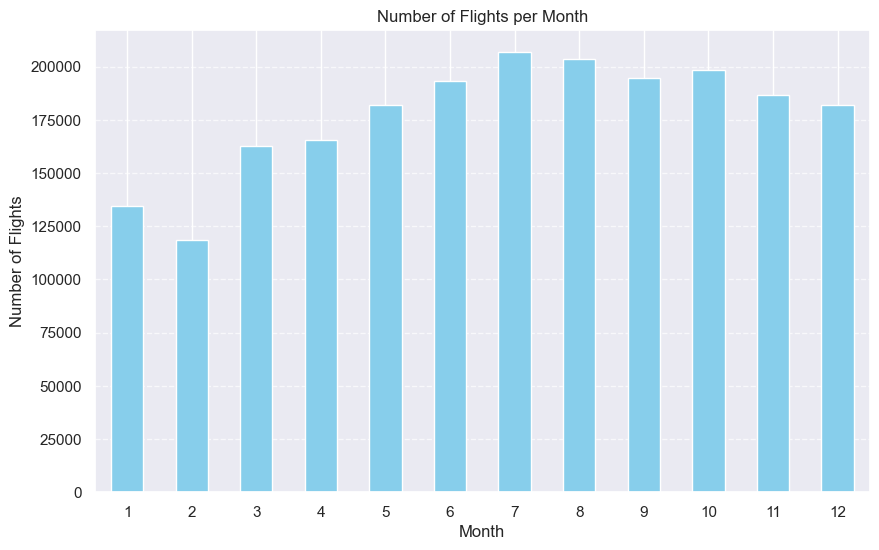

In [35]:
# Frequency of Flights
# Assuming flight_data contains the DataFrame with flight information including the flight date
# If the flight date is not in datetime format, convert it first
flight_data['FlightDate'] = pd.to_datetime(flight_data['FlightDate'])

# Extract month from FlightDate
flight_data['Month'] = flight_data['FlightDate'].dt.month

# Count the number of flights for each month
flights_per_month = flight_data['Month'].value_counts().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))
flights_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Relationship between Delays and Months

In [36]:
df_agg = flight_data.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime/Early", "Small Delay", "Medium Delay", "Large Delay"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime/Early,Small Delay,Medium Delay,Large Delay
Month,,,,
1,81.180401,10.635486,4.689681,3.494432
2,74.099419,14.070526,6.690153,5.139903
3,75.846775,14.207237,5.975098,3.970890
4,74.971148,14.943716,6.117184,3.967952
5,68.028205,17.797560,8.018759,6.155477
6,53.671712,21.305027,12.875545,12.147716
7,51.487911,22.150387,13.767892,12.593810
8,55.404662,20.595692,12.539798,11.459848
9,66.855466,18.026740,8.770958,6.346837


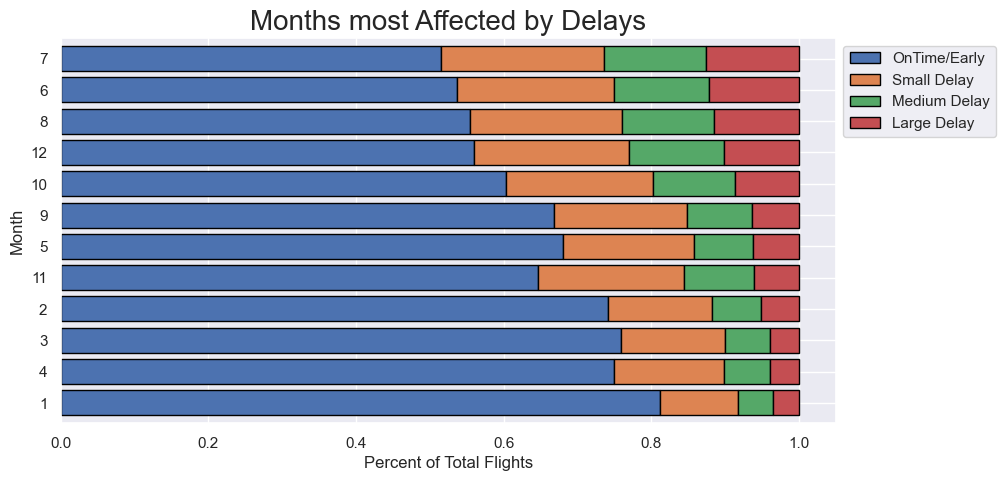

In [37]:
#Percentage of Flights that are delayed
df_agg = (
    flight_data.groupby(["Month"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Large Delay").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Months most Affected by Delays", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

##### Relationship between Delays and Day of the Week

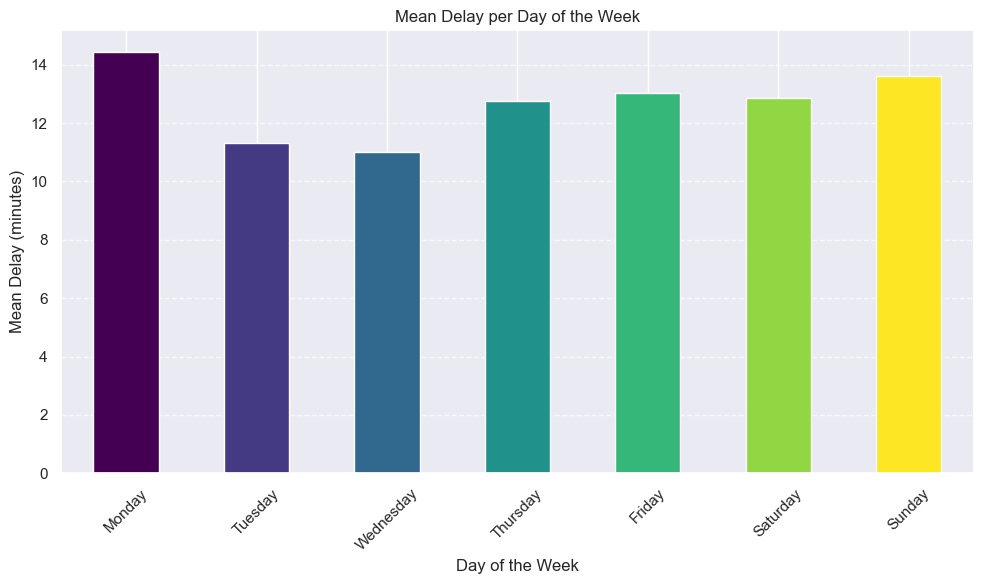

In [38]:
import matplotlib.cm as cm

# Define the custom day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the mean delay per day of the week
mean_delay_per_day = flight_data.groupby('DayOfWeek')['DepDelayMinutes'].mean()

# Plotting the mean delay per day of the week
plt.figure(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(mean_delay_per_day)))  # Generate colors from the Viridis colormap
mean_delay_per_day.plot(kind='bar', color=colors)
plt.title('Mean Delay per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delay (minutes)')
plt.xticks(mean_delay_per_day.index - 1, day_labels, rotation=45)  # Adjust index to start from 0 and set custom day labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Relationship between flight delays and the hour of Departure

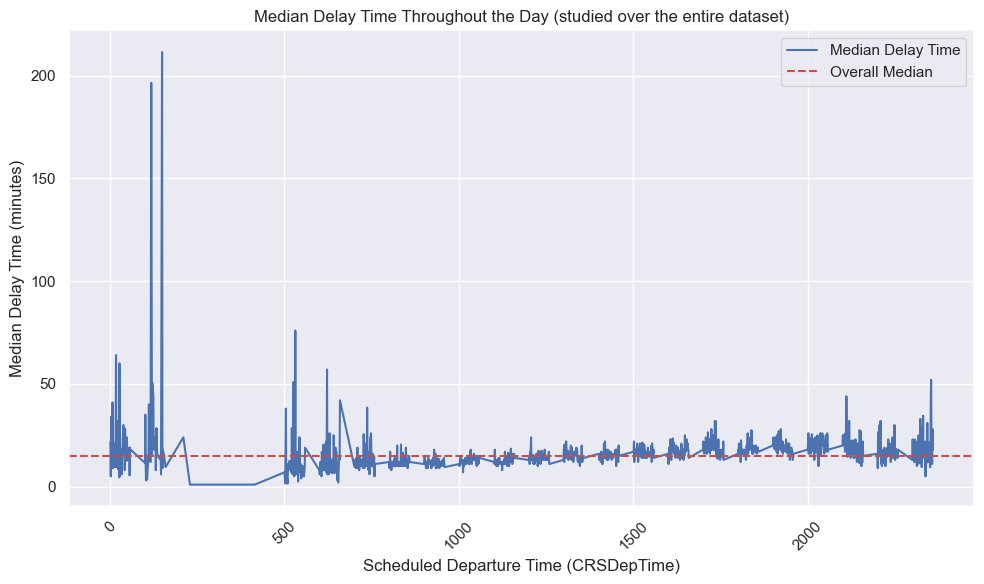

In [49]:
delayed_flights = flight_data[flight_data['DepDelayMinutes'] > 0]

# Step 1: Calculate median delay time for each scheduled departure time (CRSDepTime)
median_delay_per_time = delayed_flights.groupby('CRSDepTime')['DepDelayMinutes'].median()

# Step 2: Calculate overall median delay time
overall_median_delay = median_delay_per_time.median()

# Step 3: Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(median_delay_per_time.index, median_delay_per_time, color='b', label='Median Delay Time')
plt.axhline(y=overall_median_delay, color='r', linestyle='--', label='Overall Median')
plt.title('Median Delay Time Throughout the Day (studied over the entire dataset)')
plt.xlabel('Scheduled Departure Time (CRSDepTime)')
plt.ylabel('Median Delay Time (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


### Analysing Types of Delays 

#### Distribution of the different types of delays

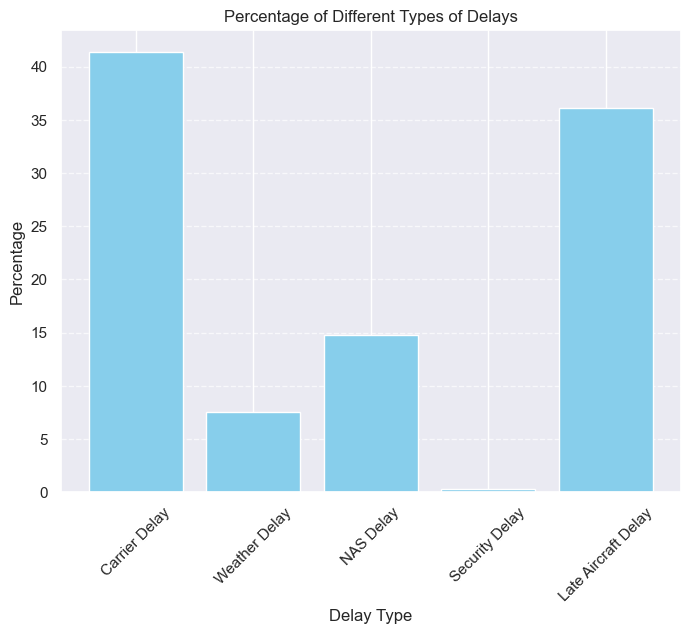

In [42]:
# Assuming flight_data contains the DataFrame with flight information including delay types
# If the delay types are stored in columns with the names provided, replace them accordingly

# Calculate the total delay time for each type of delay
total_carrier_delay = flight_data['CarrierDelay'].sum()
total_weather_delay = flight_data['WeatherDelay'].sum()
total_nas_delay = flight_data['NASDelay'].sum()
total_security_delay = flight_data['SecurityDelay'].sum()
total_late_aircraft_delay = flight_data['LateAircraftDelay'].sum()

# Calculate the total delay time across all delay types
total_delay = (
    total_carrier_delay + 
    total_weather_delay + 
    total_nas_delay + 
    total_security_delay + 
    total_late_aircraft_delay
)

# Calculate the percentage of delay time for each type of delay
percentage_carrier_delay = (total_carrier_delay / total_delay) * 100
percentage_weather_delay = (total_weather_delay / total_delay) * 100
percentage_nas_delay = (total_nas_delay / total_delay) * 100
percentage_security_delay = (total_security_delay / total_delay) * 100
percentage_late_aircraft_delay = (total_late_aircraft_delay / total_delay) * 100

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'], 
        [percentage_carrier_delay, percentage_weather_delay, percentage_nas_delay, 
         percentage_security_delay, percentage_late_aircraft_delay], color='skyblue')
plt.title('Percentage of Different Types of Delays')
plt.xlabel('Delay Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
print("Percentage of Carrier Delay:", percentage_carrier_delay)
print("Percentage of Weather Delay:", percentage_weather_delay)
print("Percentage of NAS Delay:", percentage_nas_delay)
print("Percentage of Security Delay:", percentage_security_delay)
print("Percentage of Late Aircraft Delay:", percentage_late_aircraft_delay)

Percentage of Carrier Delay: 41.363323534677775
Percentage of Weather Delay: 7.521848334135925
Percentage of NAS Delay: 14.734796738106981
Percentage of Security Delay: 0.2509420826216741
Percentage of Late Aircraft Delay: 36.129089310457644


##### What are the reasons between most delays?

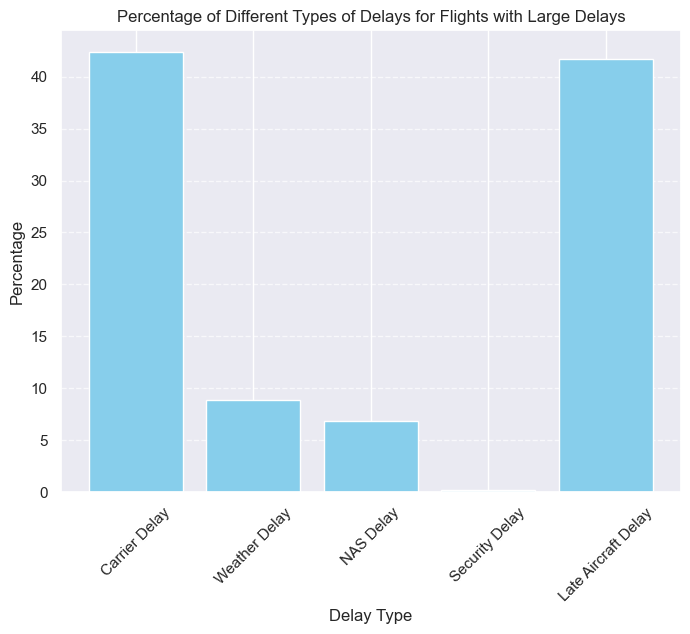

In [44]:
# Filter flights with large delays (e.g., delays exceeding 45 minutes)
large_delays = flight_data[flight_data['DepDelayMinutes'] > 45]

# Calculate the total delay time for each type of delay for large delays
total_carrier_delay_large = large_delays['CarrierDelay'].sum()
total_weather_delay_large = large_delays['WeatherDelay'].sum()
total_nas_delay_large = large_delays['NASDelay'].sum()
total_security_delay_large = large_delays['SecurityDelay'].sum()
total_late_aircraft_delay_large = large_delays['LateAircraftDelay'].sum()

# Calculate the total delay time across all delay types for large delays
total_delay_large = (
    total_carrier_delay_large + 
    total_weather_delay_large + 
    total_nas_delay_large + 
    total_security_delay_large + 
    total_late_aircraft_delay_large
)

# Calculate the percentage of delay time for each type of delay for large delays
percentage_carrier_delay_large = (total_carrier_delay_large / total_delay_large) * 100
percentage_weather_delay_large = (total_weather_delay_large / total_delay_large) * 100
percentage_nas_delay_large = (total_nas_delay_large / total_delay_large) * 100
percentage_security_delay_large = (total_security_delay_large / total_delay_large) * 100
percentage_late_aircraft_delay_large = (total_late_aircraft_delay_large / total_delay_large) * 100

# Plotting the results for large delays
plt.figure(figsize=(8, 6))
plt.bar(['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'], 
        [percentage_carrier_delay_large, percentage_weather_delay_large, percentage_nas_delay_large, 
         percentage_security_delay_large, percentage_late_aircraft_delay_large], color='skyblue')
plt.title('Percentage of Different Types of Delays for Flights with Large Delays')
plt.xlabel('Delay Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
print("Percentage of Carrier Delay for Large Delays:", percentage_carrier_delay_large)
print("Percentage of Weather Delay for Large Delays:", percentage_weather_delay_large)
print("Percentage of NAS Delay for Large Delays:", percentage_nas_delay_large)
print("Percentage of Security Delay for Large Delays:", percentage_security_delay_large)
print("Percentage of Late Aircraft Delay for Large Delays:", percentage_late_aircraft_delay_large)


Percentage of Carrier Delay for Large Delays: 42.359252643642165
Percentage of Weather Delay for Large Delays: 8.837135568159615
Percentage of NAS Delay for Large Delays: 6.833507705397588
Percentage of Security Delay for Large Delays: 0.22464480064076536
Percentage of Late Aircraft Delay for Large Delays: 41.74545928215987
